In [1]:
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.layers.experimental.preprocessing import CenterCrop

from tensorflow.keras import layers
import numpy as np
import tensorflow as tf
from tensorflow import keras


from dataset_manager import *
from predict import *
from trame_show import *

train_dataset, test_dataset = get_dataset()
d_list = list(test_dataset)

X_train, Y_train = get_X_Y(train_dataset)

X_test, Y_test = get_X_Y(test_dataset)

X_login_mdp, _ = get_pics_from_file(f"../tohack/pics_LOGINMDP.bin")

#X = []
#for i in range(0, len(Y_train) - 1):
#    X.append([Y_train[i], X_train[i]])




In [2]:
from sklearn.datasets import make_regression
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot
from dataset_manager import *
from predict import *

train_dataset, test_dataset = get_dataset()
X_train, Y_train = get_X_Y_vectorized_int(train_dataset)
X_test, Y_test = get_X_Y_vectorized_int(test_dataset)

X_train, Y_train = shuffle_X_Y(X_train, Y_train)
X_test, Y_test = shuffle_X_Y(X_test, Y_test)

model = Sequential()
#model.add(Flatten(input_shape=(len(X_train), 17)))
model.add(Dense(17))
for _ in range(6):
    model.add(Dense(128, activation='sigmoid'))
model.add(Dense(42))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])


model.fit(np.array(X_train), np.array(Y_train), epochs=10)
model.summary()

Epoch 1/10
7875/7875 [==============================] - 8s 998us/step - loss: 0.0241 - accuracy: 0.0850
Epoch 2/10
7875/7875 [==============================] - 8s 992us/step - loss: 0.0155 - accuracy: 0.4234
Epoch 3/10
7875/7875 [==============================] - 8s 1ms/step - loss: 0.0139 - accuracy: 0.4762
Epoch 4/10
7875/7875 [==============================] - 8s 1ms/step - loss: 0.0134 - accuracy: 0.4939
Epoch 5/10
7875/7875 [==============================] - 8s 1ms/step - loss: 0.0131 - accuracy: 0.5033
Epoch 6/10
7875/7875 [==============================] - 8s 1ms/step - loss: 0.0129 - accuracy: 0.5130
Epoch 7/10
7875/7875 [==============================] - 8s 1ms/step - loss: 0.0127 - accuracy: 0.5223
Epoch 8/10
7875/7875 [==============================] - 8s 1ms/step - loss: 0.0126 - accuracy: 0.5281
Epoch 9/10
7875/7875 [==============================] - 8s 1ms/step - loss: 0.0125 - accuracy: 0.5341
Epoch 10/10
7875/7875 [==============================] - 8s 1ms/step - loss: 0

In [3]:
test_loss, test_acc = model.evaluate(np.array(X_test), np.array(Y_test), verbose=3)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.5674617290496826


In [4]:
def get_prediction_list(model, pic="tohack/pics_LOGINMDP"):
    """
    The model is like "model = LinearRegression()" (or other algorithms)
    """

    x_pred, info = get_pics_from_file(f"../{pic}.bin")
    
    res = []

    preds_brut = model.predict(np.array(x_pred))
    for pred in preds_brut:
        itemindex = np.where(pred==max(pred))[0][0]
        prediction = d_list[itemindex]
        if "data" in pic or prediction != 'NOKEY':
            res.append(prediction)
    return res


def get_creds(prediction_list):
    for i_k in range(len(prediction_list)):
        if prediction_list[i_k] == 'CTRL' and i_k + 2 < len(prediction_list) and prediction_list[i_k + 2] == 'SUPPR':
            print('#####################')
            print(prediction_list[i_k:i_k + 42])


In [5]:
def compute_accuracy():
    accuracy = {}
    accuracy_count = {}
    
    preds_brut = model.predict(np.array(X_test))
    
    for pred, y in zip(preds_brut, Y_test):
        realitemindex = np.where(y==1)[0][0]
        key = d_list[realitemindex]
        itemindex = np.where(pred==max(pred))[0][0]
        
        if realitemindex == itemindex:
            if key not in accuracy:
                accuracy[key] = 0
                accuracy_count[key] = 0
            accuracy[key] += 1
        if key not in accuracy_count:
            accuracy_count[key] = 0
        accuracy_count[key] += 1


    for key in accuracy:
        accuracy[key] /= accuracy_count[key]

    return accuracy
    
accuracy = compute_accuracy()
for key, acc in accuracy.items():
    print(key, acc)
    
print("accuracy: ", sum(accuracy.values()) / 42)

K 0.838165524512388
ENTER 0.8531713900134953
CTRL 0.9707472959685349
3 0.7162482235907153
I 0.7926972909305064
9 0.4100684261974585
T 0.478134110787172
D 0.5140845070422535
J 0.7438616071428571
4 0.4082389289392379
NOKEY 0.9469195706513748
SPACE 0.25895316804407714
N 0.8354247104247104
SHIFT 0.9667705088265836
B 0.4222086638194021
G 0.48632926119837117
0 0.4585185185185185
O 0.8613793103448276
L 0.8826530612244898
SUPPR 0.7665330661322646
Z 0.679135008766803
7 0.879154078549849
U 0.4708171206225681
E 0.397196261682243
C 0.8671171171171171
F 0.4399538106235566
V 0.8478949751018561
S 0.6104523495827844
H 0.2771929824561403
6 0.5889014722536806
P 0.6943991299619359
A 0.4931592039800995
R 0.4727488151658768
W 0.5976355483081941
X 0.19001677852348994
2 0.07324301439458086
M 0.39365853658536587
1 0.008521516829995739
Q 0.024278215223097113
Y 0.012890431333663858
accuracy:  0.5387969883660032


In [6]:
res = get_prediction_list(model)
print(res)

['M', '7', 'P', 'P', '7', 'K', 'A', '7', 'P', 'CTRL', 'E', 'Z', 'E', 'E', 'A', 'P', 'T', '7', 'P', 'P', 'P', 'P', 'Z', '3', 'T', 'T', 'Q', '7', 'E', '7', 'T', 'CTRL', 'P', 'H', 'E', '7', 'P', 'CTRL', 'E', 'CTRL', '0', 'A', 'E', 'P', 'CTRL', 'M', '3', 'P', 'Z', 'Z', 'CTRL', 'P', 'A', 'T', '0', 'P', 'CTRL', 'CTRL', 'P', 'T', 'CTRL', 'P', 'P', 'Z', 'Z', 'P', 'CTRL', 'E', 'A', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'A', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', 'CTRL', '7', 'CTRL', 'CTRL', 'CTRL'

In [7]:
get_creds(res)

#####################
['CTRL', 'CTRL', 'SUPPR', '0', 'SUPPR', '0', 'SUPPR', 'SUPPR', '0', '0', '0', 'SUPPR', 'SUPPR', 'SUPPR', '0', 'SUPPR', 'SUPPR', '0', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'ENTER', 'SUPPR', 'SUPPR', '0', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'CTRL', 'SUPPR', '0', 'SUPPR', '0', 'SUPPR', '0', '0', '0', '0']
#####################
['CTRL', '0', 'SUPPR', '0', 'SUPPR', '0', 'SUPPR', '0', 'SUPPR', '0', 'CTRL', '0', '0', '0', 'SUPPR', '0', 'SUPPR', 'SUPPR', 'SUPPR', '0', 'SUPPR', 'SUPPR', 'SUPPR', '0', '0', 'SUPPR', 'SUPPR', 'SUPPR', '0', '0', '0', 'SUPPR', '0', 'SUPPR', 'SUPPR', '0', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR', 'SUPPR']
#####################
['CTRL', 'SUPPR', 'SUPPR', '0', '0', 'SUPPR', '0', 'SUPPR', 'SUPPR', 'SUPPR', 'SHIFT', '0', 'SUPPR', 'SUPPR', '7', '0', 'SUPPR', 'SUPPR', '0', '0', '0', '0', 'SUPPR', 'ENTER', '0', 'SUPPR', 'SUPPR', 'SUPPR', '0', '0', 'SUPPR', 'CTRL', 'SUPPR', 'SUPPR', 'SUPPR', 'SHIFT', 'SUPPR', '0', 'SUPPR', 'SUPPR', '0

In [28]:
from termcolor import colored

out = ""
trames80 = {}
for index, key in enumerate(res):
    if key not in ['SUPPR', 'CTRL', 'SHIFT']:
        out += colored(key, 'red' if accuracy[key] >= 0.85 else 'grey') + " "
        if accuracy[key] >= 0.85:
            if key not in trames80:
                trames80[key] = []
            trames80[key].append(X_login_mdp[index])
print(out)
    

    

M 7 P P 7 K A 7 P E Z E E A P T 7 P P P P Z 3 T T Q 7 E 7 T P H E 7 P E 0 A E P M 3 P Z Z P A T 0 P P T P P Z Z P E A A 7 P 7 K 4 0 6 7 7 SPACE 0 0 0 0 0 0 0 0 ENTER 0 0 0 0 0 0 0 ENTER 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 ENTER 0 0 0 0 0 P 0 0 0 0 0 0 0 0 0 0 0 P 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ENTER 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 T P 7 E 7 3 L A P P H T Z 0 R E K H P P Z P E P A P P 7 2 A P Z H A T Z E H Z Z Z R X D Z D D Z X D Z Z Z E R E D R D R R R D Z E D Z X Z D D D R X R SPACE Z D R R Z Z X A Z Z Z D R Z X D D X Z Z Z Z Z Z D Z Z R Z Z D R Z R Z R Z D Z Z P 9 3 S T T 9 T W T T T Y G T T T Y T T T T T T T T T T T T T T T T T G L Y Y T T Y T T T T T T Y T R R R R A W W W D W A W D F W L W W A A D SPACE M X M M M R M M M M R R R R M M R M M R M M M R M M M M M M M M M R M R M R M M M Z M M M M M M M R M P M M M Z 6 M Z F M M R R M R M R M M R R M R M R R R Z 7 V I I 6 I I I I K V I I I I V I I I SPACE I I I I I S L I I 

['7', 'ENTER', 'L', 'O', 'C']


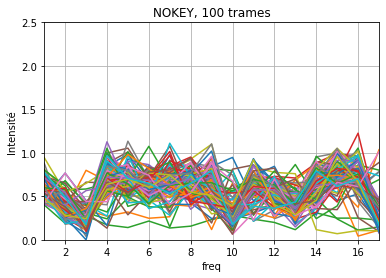

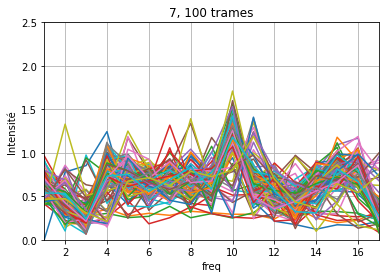

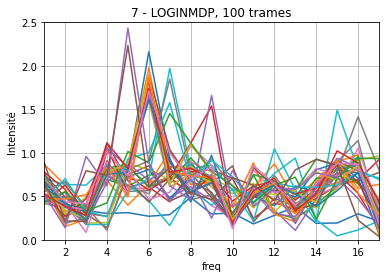

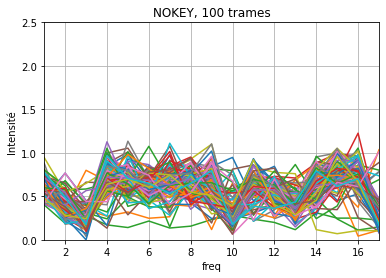

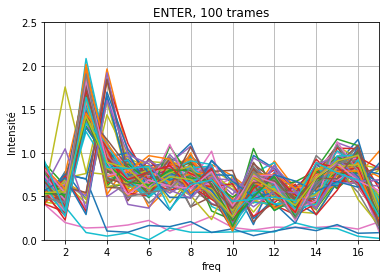

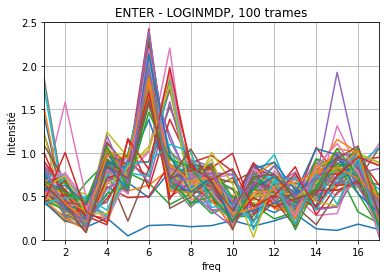

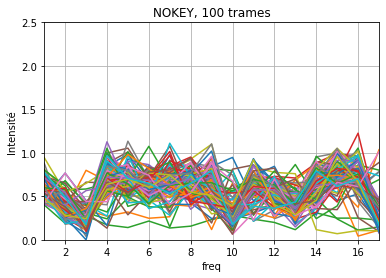

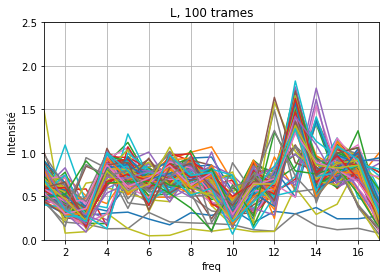

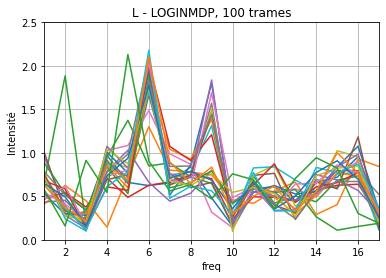

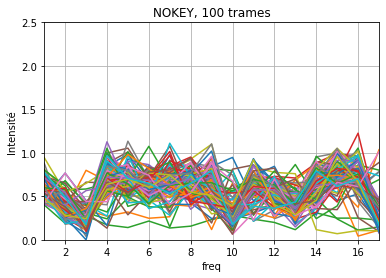

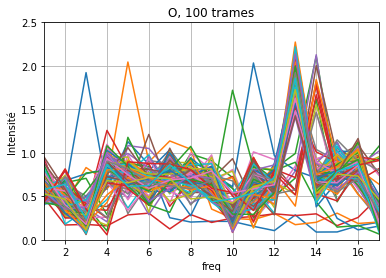

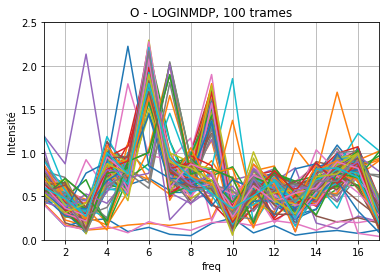

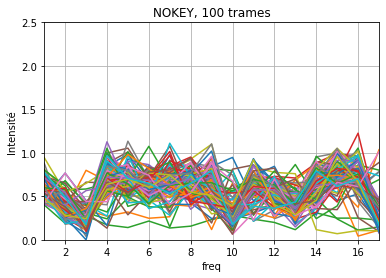

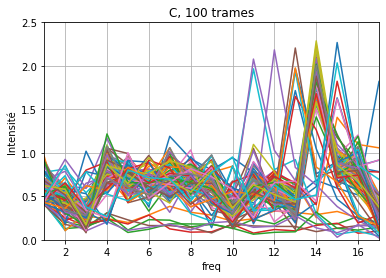

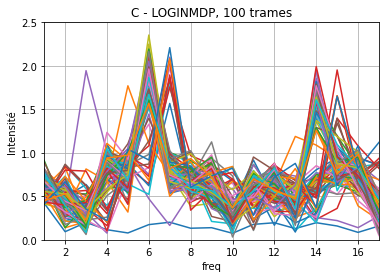

In [29]:
print(list(trames80.keys()))

for key in trames80:
    trame_show_key('NOKEY')
    trame_show_key(key)
    trame_show(trames80[key], f"{key} - LOGINMDP", 0)
    print('===========================')


In [ ]:
def get_prediction_list2(model, pic="tohack/pics_LOGINMDP"):
    """
    The model is like "model = LinearRegression()" (or other algorithms)
    """

    x_pred, info = get_pics_from_file(f"../{pic}.bin")
    
    res = []

    preds_brut = model.predict(np.array(x_pred))
    for pred in preds_brut:
        itemindex1 = np.where(pred==max(pred))[0][0]
        pred[itemindex1] = 0
        itemindex2 = np.where(pred==max(pred))[0][0]
        prediction = (d_list[itemindex1], d_list[itemindex2])
        if "data" in pic or prediction != 'NOKEY':
            res.append(prediction)
    return res


In [ ]:
res2 = get_prediction_list2(model)
print(res2)